In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# Set-up variables

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# load metadata
metadata = pd.read_csv("stp_metadata.csv")

# testing - STeg/OMC

In [78]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/STeg_220429_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"

print(meta_sp_inj.loc[0,'path'])

/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/OMC_STeg_220208_b0_aligned_to_STeg_220429_NO_subtracted.tif


In [79]:
images = []
for i in range(meta_sp_inj.shape[0]):
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))

In [80]:
# import allen aligned to STeg_220429_straight_asr
atlas_path = home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/OMC_STeg_220429_b2_hand_straightened_asr_aligned_10um/registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)

In [77]:
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)

working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


# Plot across axes

Text(0, 0.5, 'Int Fluor')

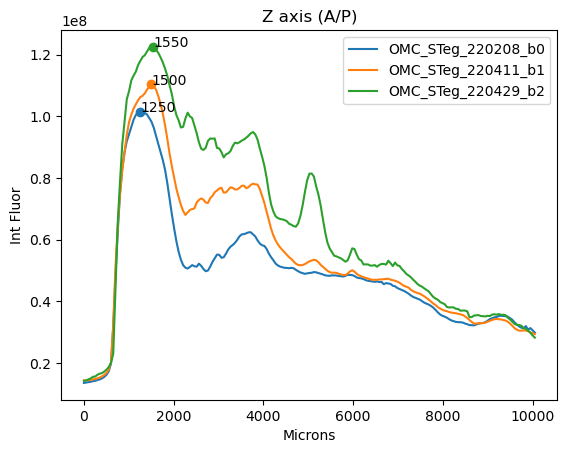

In [80]:
# visualize max fluor across different axes

# plot z axis

im_z = [im.sum(axis=1).sum(axis=1) for im in images]

for i in range(len(im_z)):
    br = im_z[i]
    plt.plot(np.linspace(0,201*50, 201), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*50
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("Z axis (A/P)")
plt.xlabel("Microns")
plt.ylabel("Int Fluor")

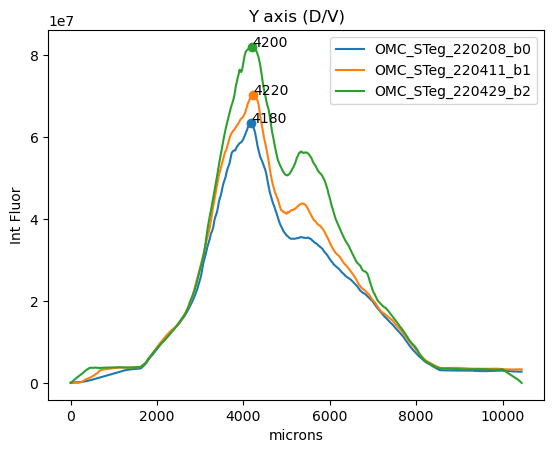

In [81]:
# plot y axis

im_ax = [im.sum(axis=0).sum(axis=1) for im in images]

for i in range(len(im_ax)):
    br = im_ax[i]
    plt.plot(np.linspace(0, br.shape[0]*20, br.shape[0]), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*20
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("Y axis (D/V)")
plt.xlabel("microns")
plt.ylabel("Int Fluor")

plt.show()

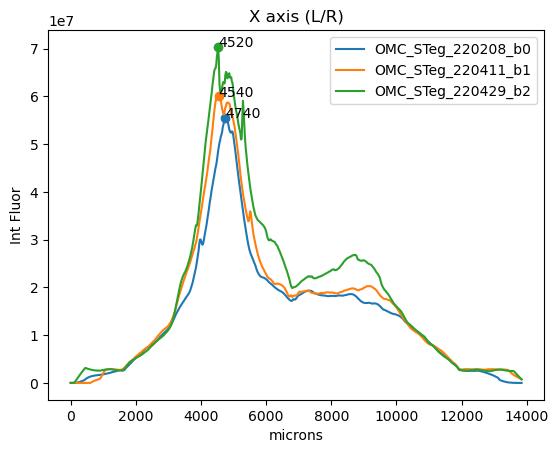

In [82]:
# plot x axis

im_ax = [im.sum(axis=0).sum(axis=0) for im in images]

for i in range(len(im_ax)):
    br = im_ax[i]
    plt.plot(np.linspace(0, br.shape[0]*20, br.shape[0]), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*20
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("X axis (L/R)")
plt.xlabel("microns")
plt.ylabel("Int Fluor")

plt.show()

# Plot contours

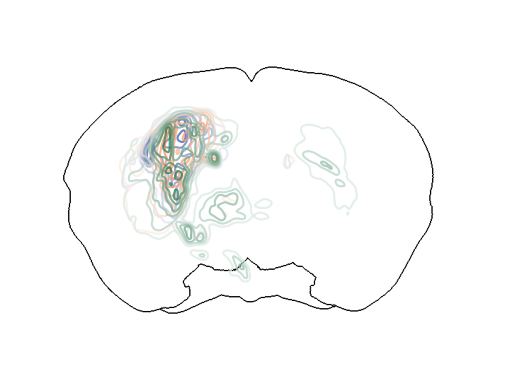

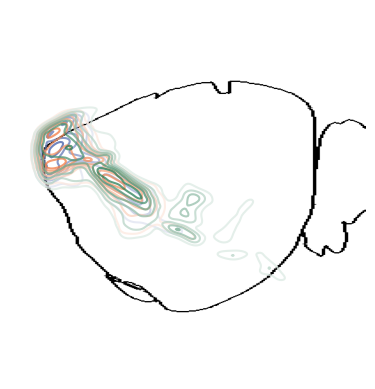

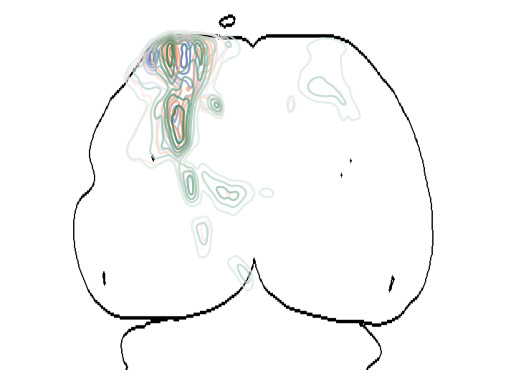

In [84]:
plot_contour(images, mask_dict=masks, masks_to_plot=["grey", "CTX"], view="front")
plt.show()

plot_contour(images, mask_dict=masks, masks_to_plot=["grey", "CTX"], view="side")
plt.show()

plot_contour(images, mask_dict=masks, masks_to_plot=["grey", "CTX"], view="top")
plt.show()

# napari visualization

In [105]:
viewer = napari.Viewer()
colors = ["green", "cyan", "magenta"]
for i in range(len(images)):
    viewer.add_image(
        images[i],
        name=meta_sp_inj.loc[i, 'brain'],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )
    


In [114]:
viewer.add_image(
    mask_dict['OMCi'],
    name="OMCi",
    scale=[2.5,1,1],
    opacity=0.5,
    blending="additive",
    colormap="red"
)

<Image layer 'OMCi' at 0x17c1615a0>

In [112]:
colors = ['bop blue', 'bop orange', 'bop purple']
for i in range(len(mask_dict['inj'])):
    viewer.add_image(
        mask_dict['inj'][i],
        name='inj_'+meta_sp_inj.loc[i, 'brain'],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         opacity=0.6,
         blending="additive",
        colormap=colors[i]
        )

# Apply threshold

In [81]:
im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator"


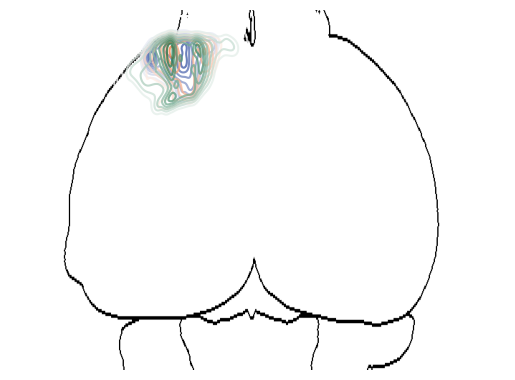

In [86]:
# plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="front")
# plt.show()

# plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="side")
# plt.show()

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.show()



In [83]:
im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


for i in range(len(images)):
    im = images[i]
    m_inj = masks['inj'][i]
    masks['inj'+str(i)] = m_inj

plot_contour([im], mask_dict=masks, roi="inj"+str(i), masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.show()

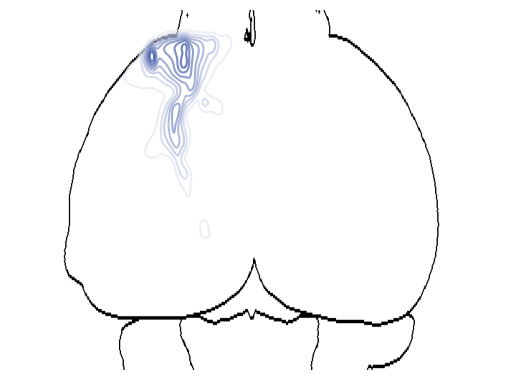

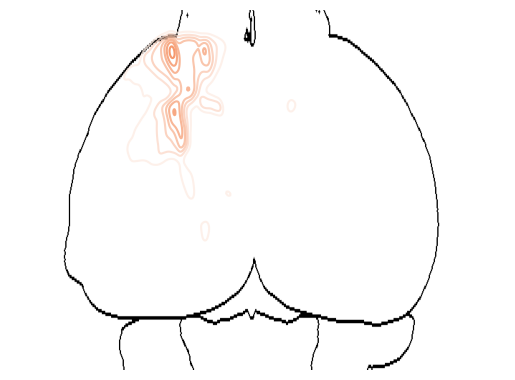

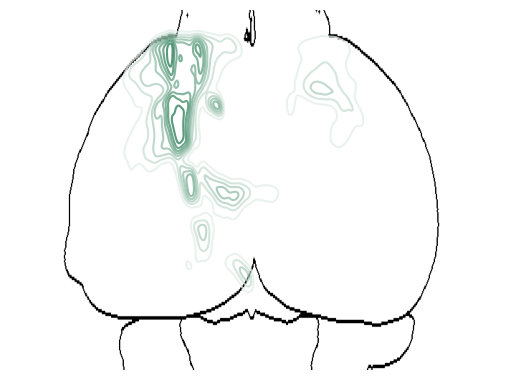

In [85]:
colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")


In [250]:
im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


Text(0, 0.5, 'Int Fluor')

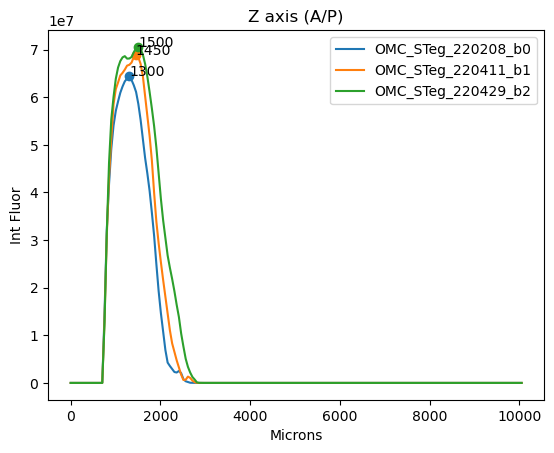

In [270]:
# visualize max fluor across different axes

# plot z axis

im_thr = [images[i]*masks['inj'][i] for i in range(len(images))]

im_z = [im.sum(axis=1).sum(axis=1) for im in im_thr]

for i in range(len(im_z)):
    br = im_z[i]
    plt.plot(np.linspace(0,201*50, 201), br, label=meta_sp_inj.loc[i,'brain'])
    max_F = br.max()
    maxidx_F = br.argmax()*50
    plt.scatter(maxidx_F, max_F)
    plt.annotate(str(maxidx_F), (maxidx_F, max_F))

plt.legend()
plt.title("Z axis (A/P)")
plt.xlabel("Microns")
plt.ylabel("Int Fluor")

In [284]:
test = im_thr[0]
z = test.sum(axis=1).sum(axis=1)

# Find the indices of non-zero elements
nonzero_indices = np.nonzero(z)
first = nonzero_indices[0][0]
last = nonzero_indices[0][-1]

z_m = round((first+last)/2)


x = test.sum(axis=0).sum(axis=0)
# Find the indices of non-zero elements
nonzero_indices = np.nonzero(x)
first = nonzero_indices[0][0]
last = nonzero_indices[0][-1]
x_m = round((first+last)/2)

print(z_m, x_m)

34 233


In [313]:
test = masks['inj0']
z = test.sum(axis=1).sum(axis=1)
z_idx = np.nonzero(z)[0]
z_w = z[z_idx]
print(z_idx.shape, z_w.shape)
z_avg = np.average(z_idx, weights=z_w)

x = test.sum(axis=0).sum(axis=0)
x_idx = np.nonzero(x)[0]
x_w = x[x_idx]
x_avg = np.average(x_idx, weights=x_w)
print(z_avg, x_avg)

(40,) (40,)
27.93327880345875 236.95292903326322


In [343]:
z_data = []
for i in range(z_idx.shape[0]):
    z_data.append([z_idx[i]]*z_w[i])
z_flat = [item for sublist in z_data for item in sublist]
z_flat = pd.Series(z_flat)

z_stats = pd.Series(dtype='int')
z_stats['median'] = z_flat.median()
z_stats['q.05'] = z_flat.quantile(q=0.01)
z_stats['q.95'] = z_flat.quantile(q=0.95)



x_data = []
for i in range(x_idx.shape[0]):
    x_data.append([x_idx[i]]*x_w[i])
x_flat = [item for sublist in x_data for item in sublist]
x_flat = pd.Series(x_flat)

x_stats = pd.Series(dtype='int')
x_stats['median'] = x_flat.median()
x_stats['q.05'] = x_flat.quantile(q=0.01)
x_stats['q.95'] = x_flat.quantile(q=0.95)
x_stats

median    238.0
q.05      192.0
q.95      269.0
dtype: float64

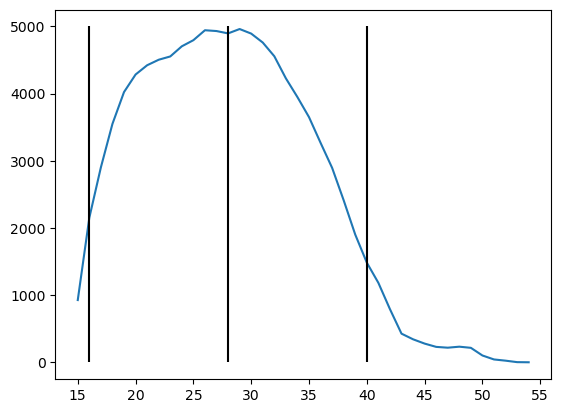

In [339]:
plt.plot(z_idx, z_w)
plt.vlines(stats['median'], ymin=0, ymax=5000, color="black")
plt.vlines(stats['q.05'], ymin=0, ymax=5000, color="black")
plt.vlines(stats['q.95'], ymin=0, ymax=5000, color="black")

plt.show()



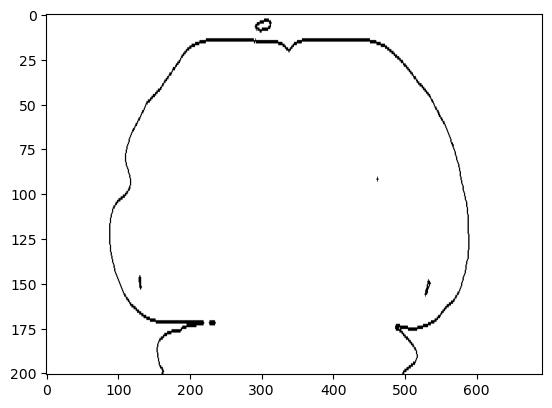

In [245]:
# plot contour
# create outline of max project slice
view="top"


# set prarmeters
if view=="front":
    ar = 1
    transform = (0,1,2)
elif view=="side":
    ar = 1/2.5
    transform = (2,1,0)
elif view=="top":
    ar=2.5
    transform = (1,0,2)

# transform/rotate data
im_tr = [np.transpose(im, transform) for im in images]
mask_tr = copy.deepcopy(masks)
for area in mask_tr:
    if type(mask_tr[area])==list:
        for i in range(len(mask_tr[area])):
            mask_tr[area][i] = np.transpose(mask_tr[area][i], transform)
    else:
        for i in range(len(mask_tr[area])):
            mask_tr[area] = np.transpose(mask_tr[area], transform)


outline = make_boundaries_dict(plot_areas=["grey"], mask_dict=mask_tr)


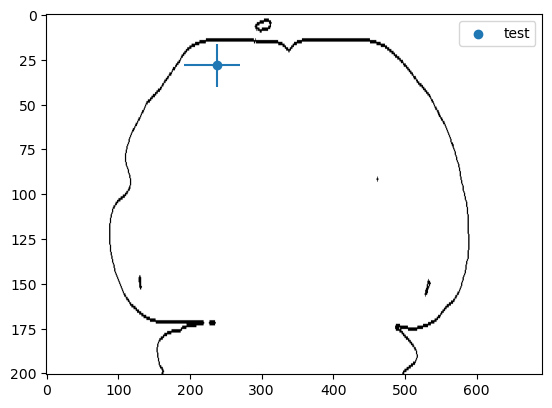

In [348]:

plt.imshow(outline, cmap="Greys", aspect=ar)
# plt.scatter(x_m, z_m)
# plt.scatter(x_avg, z_avg)
plt.scatter(x_stats['median'], z_stats['median'], label='test')
# plt.axline((x_stats['q.05'], z_stats['median']), (x_stats['q.95'], z_stats['median']))
plt.hlines(z_stats['median'], xmin=x_stats['q.05'], xmax=x_stats['q.95'])
plt.vlines(x_stats['median'], ymin=z_stats['q.05'], ymax=z_stats['q.95'])
plt.legend()

In [ ]:

# Check if there are any non-zero elements
if len(nonzero_indices[0]) > 0:
    first_nonzero_index = nonzero_indices[0][0]
    last_nonzero_index = nonzero_indices[0][-1]
    print("First non-zero index:", first_nonzero_index)
    print("Last non-zero index:", last_nonzero_index)
else:
    print("There are no non-zero elements in the array.")

In [265]:
test = masks['inj0']
testz = test.sum(axis=1).sum(axis=1)
testnp = np.nonzero(testz)[0]
testzw = testz[testnp]

print(z_m)
np.average(testnp, weights=testzw)
# print(testnp.shape)
# print(testzw.shape)


34


27.93327880345875

# plot median and quantiles

In [ ]:
# get outline
# plot contour
# create outline of max project slice
view="top"


# set prarmeters
if view=="front":
    ar = 1
    transform = (0,1,2)
elif view=="side":
    ar = 1/2.5
    transform = (2,1,0)
elif view=="top":
    ar=2.5
    transform = (1,0,2)

# transform/rotate data
im_tr = [np.transpose(im, transform) for im in images]
mask_tr = copy.deepcopy(masks)
for area in mask_tr:
    if type(mask_tr[area])==list:
        for i in range(len(mask_tr[area])):
            mask_tr[area][i] = np.transpose(mask_tr[area][i], transform)
    else:
        for i in range(len(mask_tr[area])):
            mask_tr[area] = np.transpose(mask_tr[area], transform)


outline = make_boundaries_dict(plot_areas=["grey"], mask_dict=mask_tr)


In [353]:
# get median and quantiles for each brain

xm_stats = []
zm_stats = []

for i in range(len(masks['inj'])):
    m = masks['inj'][i]


    z = m.sum(axis=1).sum(axis=1)
    z_idx = np.nonzero(z)[0]
    z_w = z[z_idx]


    x = m.sum(axis=0).sum(axis=0)
    x_idx = np.nonzero(x)[0]
    x_w = x[x_idx]


    z_data = []
    for i in range(z_idx.shape[0]):
        z_data.append([z_idx[i]]*z_w[i])
    z_flat = [item for sublist in z_data for item in sublist]
    z_flat = pd.Series(z_flat)

    z_stats = pd.Series(dtype='int')
    z_stats['median'] = z_flat.median()
    z_stats['q.05'] = z_flat.quantile(q=0.01)
    z_stats['q.95'] = z_flat.quantile(q=0.95)

    zm_stats.append(z_stats)


    x_data = []
    for i in range(x_idx.shape[0]):
        x_data.append([x_idx[i]]*x_w[i])
    x_flat = [item for sublist in x_data for item in sublist]
    x_flat = pd.Series(x_flat)

    x_stats = pd.Series(dtype='int')
    x_stats['median'] = x_flat.median()
    x_stats['q.05'] = x_flat.quantile(q=0.01)
    x_stats['q.95'] = x_flat.quantile(q=0.95)
    x_stats

    xm_stats.append(x_stats)

zm_stats

[median    28.0
 q.05      16.0
 q.95      40.0
 dtype: float64,
 median    29.0
 q.05      16.0
 q.95      42.0
 dtype: float64,
 median    30.0
 q.05      16.0
 q.95      46.0
 dtype: float64]

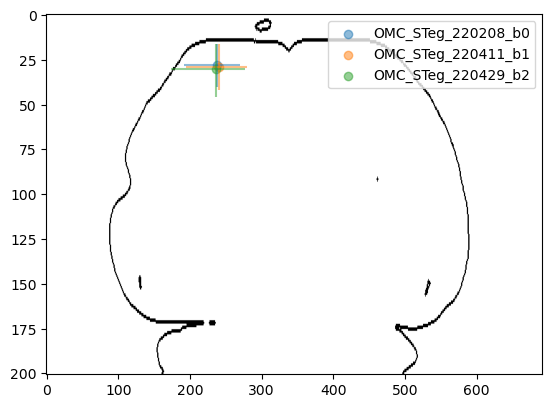

In [356]:
# plot outline
plt.imshow(outline, cmap="Greys", aspect=ar)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i in range(meta_sp_inj.shape[0]):

    plt.scatter(xm_stats[i]['median'], zm_stats[i]['median'], label=meta_sp_inj.loc[i,'brain'], alpha=0.5)
    plt.hlines(zm_stats[i]['median'], xmin=xm_stats[i]['q.05'], xmax=xm_stats[i]['q.95'], colors=colors[i], alpha=0.5)
    plt.vlines(xm_stats[i]['median'], ymin=zm_stats[i]['q.05'], ymax=zm_stats[i]['q.95'], colors=colors[i], alpha=0.5)
    plt.legend()

# ACC injection visualization

In [4]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "ACC"
align_brain = "STeg_220429"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/"+align_brain+"_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_"+align_brain+"_NO_subtracted.tif"

# print(meta_sp_inj.loc[0,'path'])
images = []
for i in range(meta_sp_inj.shape[0]):
    print("loading image:", meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))



# import allen aligned to STeg_220429_straight_asr
atlas_path = home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/OMC_STeg_220429_b2_hand_straightened_asr_aligned_10um/registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)

/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/ACC_STeg_230308_b1_aligned_to_STeg_220429_NO_subtracted.tif
working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAi
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


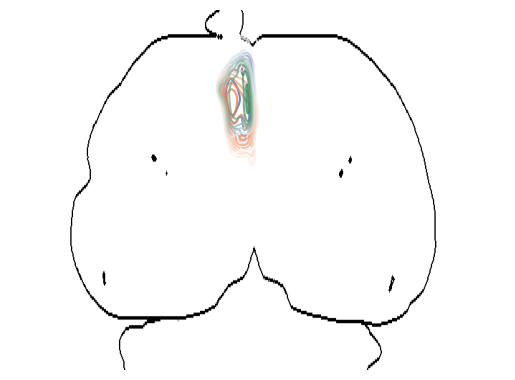

In [6]:
im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['ACAi'] for i in range(len(images))] # bitwise operator, only capture fluor above threshold and within ACAi region

# plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="front")
# plt.show()

# plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="side")
# plt.show()

plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.show()



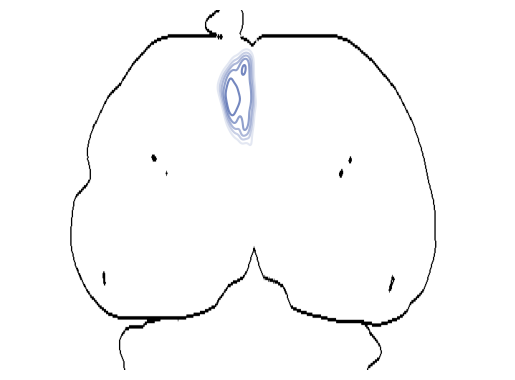

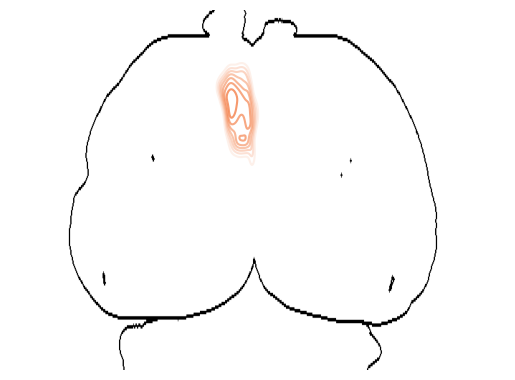

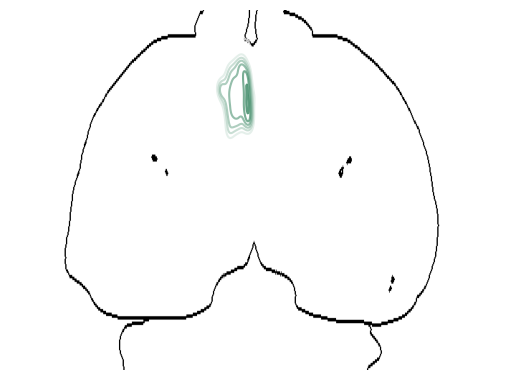

In [7]:

# im_thr = [threshold_otsu(im) for im in images]
# masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
# masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


for i in range(len(images)):
    im = images[i]
    m_inj = masks['inj'][i]
    masks['inj'+str(i)] = m_inj

# plot_contour([im], mask_dict=masks, roi="inj"+str(i), masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
# plt.show()
colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, roi="inj"+str(i), masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")


# MMus inj visualization

## MMus OMC

In [35]:
# import allen aligned to Mmus_220303_straight_asr
atlas_path = home_dir+"Emily/STP_for_MAPseq/3_brainreg_output/OMC_MMus_220303_hand_straightened_asr_aligned_10um/registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/mmus_220303_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("loading:", area)
    with open(masks_folder+"mmus_220303_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)

# im_thr = [threshold_otsu(im) for im in images]
# masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
# masks['inj'] = [masks['inj_thr'][i] & masks['ACAi'] for i in range(len(images))] # bitwise operator, only capture fluor above threshold and within ACAi region


working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAi
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


In [73]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "MMus"
inj = "OMC"
align_brain = "MMus_220303"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/"+align_brain+"_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_"+align_brain+"_NO_subtracted.tif"

# print(meta_sp_inj.loc[0,'path'])
images = []
for i in range(meta_sp_inj.shape[0]):
    print("loading image:", meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))


loading image: OMC_MMus_220119_b0
loading image: OMC_MMus_220303_b1
loading image: OMC_MMus_220324_b2


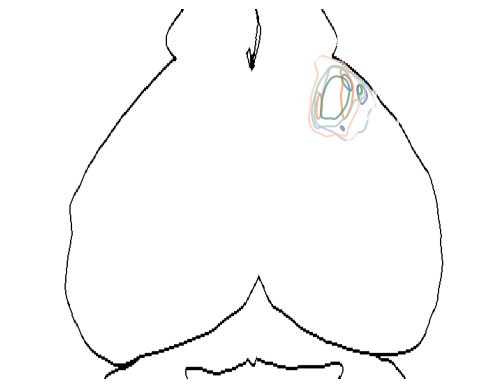

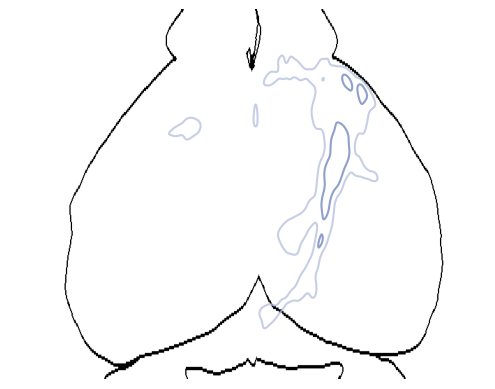

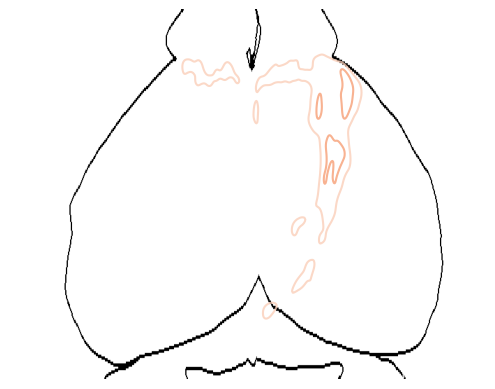

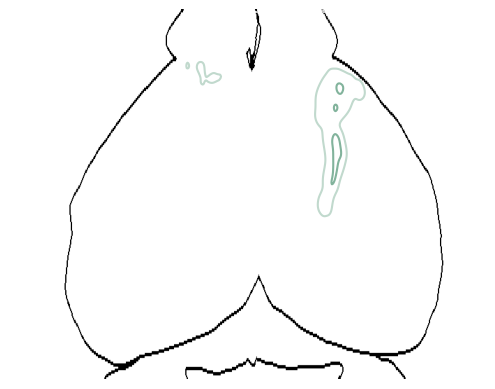

In [74]:

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator

plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], 
             view="top", ncontours=2)
plt.savefig(out_path+"mmus_omc_inj_contour.svg", bbox_inches="tight")
plt.show()


colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top", ncontours=2)


In [75]:
# load STeg/ACC brains
# aligned to STeg_220429 hand straight asr
sp = "MMus"
inj = "ACC"
align_brain = "MMus_220303"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/"+align_brain+"_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_"+align_brain+"_NO_subtracted.tif"

# print(meta_sp_inj.loc[0,'path'])
images = []
for i in range(meta_sp_inj.shape[0]):
    print("loading image:", meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))


loading image: ACC_MMus_230403_b1
loading image: ACC_MMus_230404_b2
loading image: ACC_MMus_230427_b3


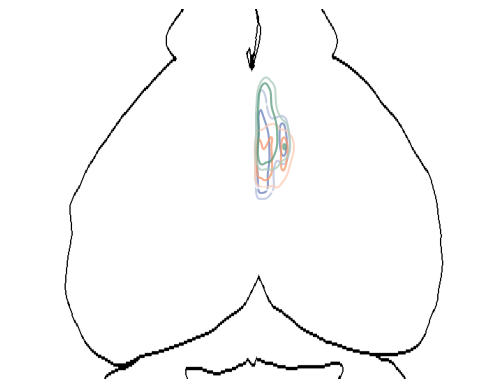

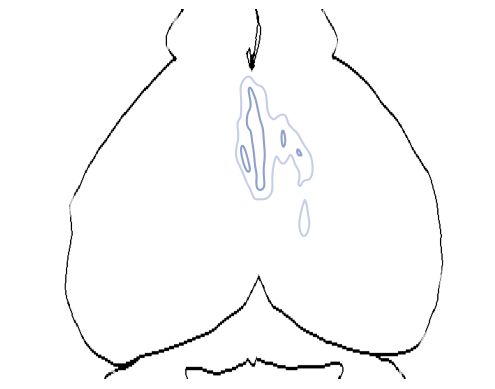

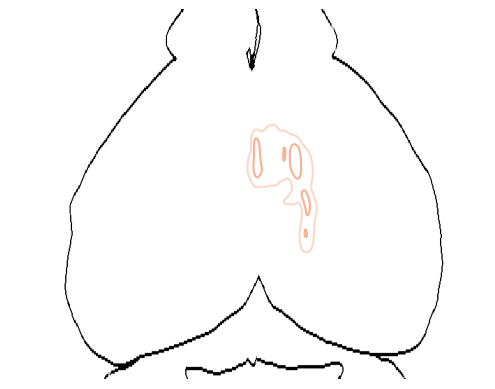

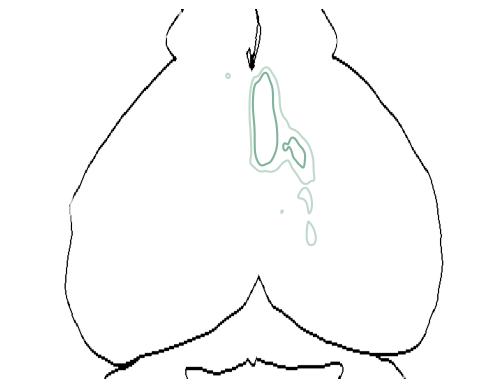

In [76]:
im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['ACAi'] for i in range(len(images))] # bitwise operator

plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], 
             view="top", ncontours=2)
plt.savefig(out_path+"mmus_acc_inj_contour.svg", bbox_inches="tight")
plt.show()


colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top", ncontours=2)
